# Face Recognition Project
### This is a small machine learning project I created during my ML&DL course on Udemy.

In [50]:
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA 
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn import metrics
import numpy as np

olivetti_faces = fetch_olivetti_faces()

In [51]:
olivetti_faces.data.shape

(400, 4096)

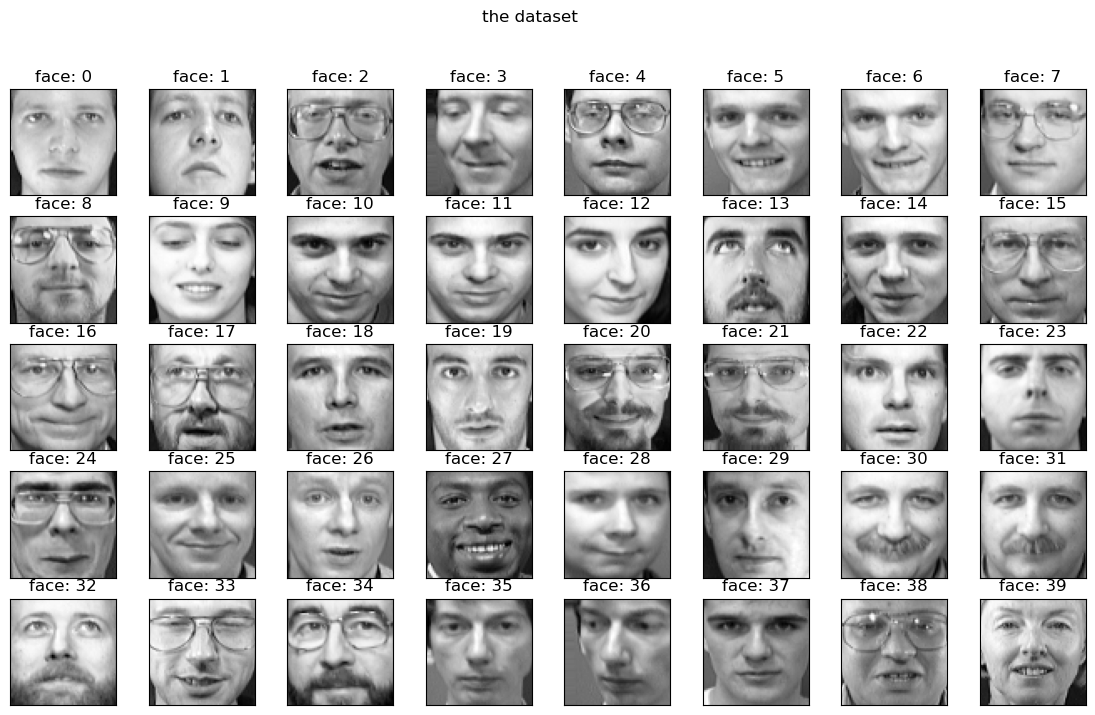

In [52]:
#show all faces

features = olivetti_faces.data
targets = olivetti_faces.target
fig,subplots = plt.subplots(nrows = 5,ncols=8,figsize=(14,8))
subplots = subplots.flatten()
for uId in np.unique(targets):
    imageIndex = uId*8
    subplots[uId].imshow(features[imageIndex].reshape(64,64),cmap='gray')
    subplots[uId].set_xticks([])
    subplots[uId].set_yticks([])
    subplots[uId].set_title("face: %s" % uId)
plt.suptitle("the dataset")
plt.show()

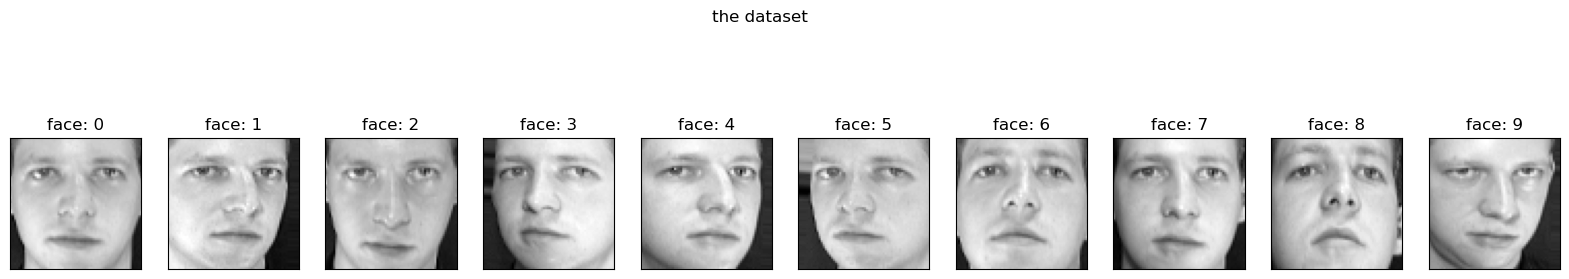

In [53]:
#show all pics of one face

fig,subplots = plt.subplots(nrows = 1,ncols=10,figsize=(20,4))
for uId in range(10):
    subplots[uId].imshow(features[uId].reshape(64,64),cmap='gray')
    subplots[uId].set_xticks([])
    subplots[uId].set_yticks([])
    subplots[uId].set_title("face: %s" % uId)
plt.suptitle("the dataset")
plt.show()

In [54]:
x_train,x_test,y_train,y_test = train_test_split(features,targets,test_size=0.25,stratify=targets,random_state=0)

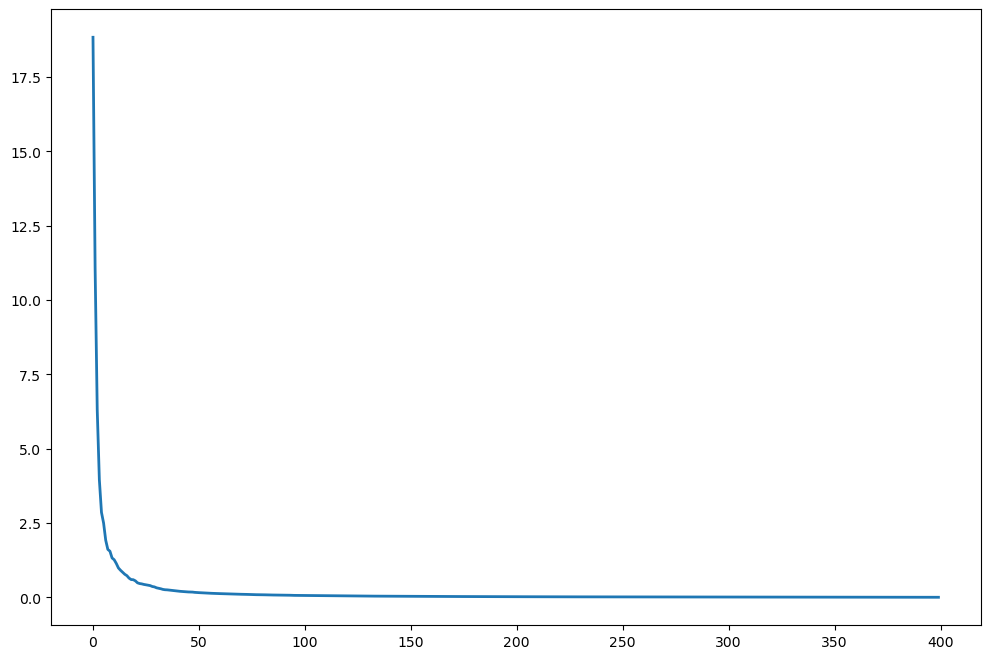

In [55]:
#PCA number of components

pca = PCA()
pca.fit(features)

plt.figure(1,figsize=(12,8))
plt.plot(pca.explained_variance_,linewidth=2)
plt.xlabel = "components"
plt.ylabel = "explained variance"
plt.show() 

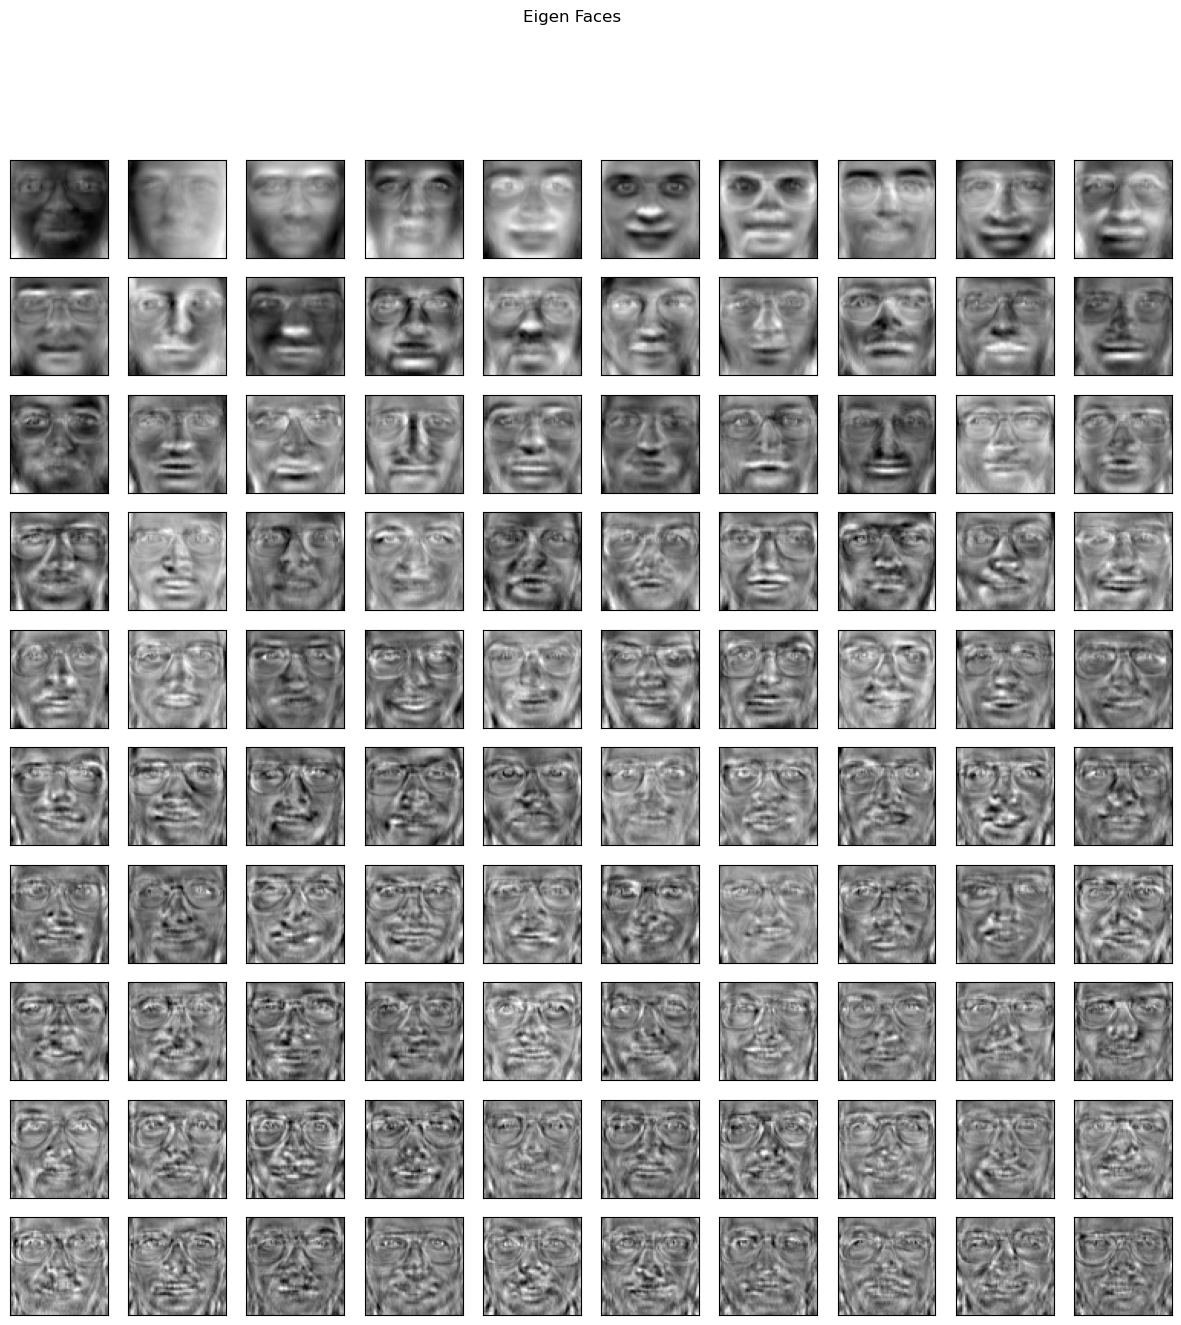

In [56]:
#PCA eigen vectors

pca=PCA(n_components=100,whiten=True )
pca.fit(x_train)
x_train_pca=pca.transform(x_train)
x_test_pca = pca.transform(x_test)
x_pca = pca.fit_transform(features)
eigen_faces = pca.components_.reshape(len(pca.components_),64,64)

fig,subplots = plt.subplots(nrows = 10,ncols=10,figsize=(15,15))
subplots=subplots.flatten()
for i in range(len(pca.components_)):
    subplots[i].imshow(eigen_faces[i],cmap="gray")
    subplots[i].set_xticks([])
    subplots[i].set_yticks([])
plt.suptitle("Eigen Faces")
plt.show()

In [57]:
#Machine learning models

models = [("Logistic Regression",LogisticRegression()),("Support Vector Machine",SVC()),("Naive Bayes classifier",GaussianNB())]
for name,model in models:
    classifier_model = model
    classifier_model.fit(x_train_pca,y_train)
    
    y_pred = classifier_model.predict(x_test_pca)
    print("Result with %s" % name)
    print("Accuracy Score: %s" % (metrics.accuracy_score(y_test,y_pred)))

Result with Logistic Regression
Accuracy Score: 0.92
Result with Support Vector Machine
Accuracy Score: 0.95
Result with Naive Bayes classifier
Accuracy Score: 0.89


In [59]:
#Cross-Validation with K-Fold 

models = [("Logistic Regression",LogisticRegression()),("Support Vector Machine",SVC()),("Naive Bayes classifier",GaussianNB())]
for name,model in models:
    kfold = KFold(n_splits=5,shuffle=True,random_state=0)
    cv_scores=cross_val_score(model,x_pca,targets,cv=kfold)
    
    print("Mean of cross validation scores: %s" % cv_scores.mean())

Mean of cross validation scores: 0.9324999999999999
Mean of cross validation scores: 0.8525
Mean of cross validation scores: 0.78
